In [9]:
import numpy as np
import matplotlib.pyplot as plt


def complete_cc(hop_list):
    # Create all the complex conjugate hoppings if they do not exist already
    all_hops = hop_list.copy()
    for hop in hops:
        o1,o2,n,m,t = hop
        cc = [o2,o1,-n,-m,np.conj(t)]

        if cc not in all_hops:
            all_hops.append(cc)

    return all_hops


class hop_utils:
    hops = []
    orbs = []
    prims = []
    pos = [] # orbital positions
    rules = False
    
    
    def set_prims(self, prim_vecs):
        self.prims = prim_vecs.copy()
    
    def set_orbs(self, orb_names, orb_pos):
        self.pos = orb_pos.copy()
        self.orbs = orb_names.copy()
        self.No = len(orb_names)
        self.orbs_dic = {orbs[i]:i for i in range(No)}
        
        
        

    
    def set_hops(self, hop_list):
        self.hops = complete_cc(hop_list)
        


In [30]:
def set_duplication_rules(self, join, A1, A2):
    self.join = join
    self.new_prims = [A1,A2]
    self.rules = True
    

    
def duplicate_orbs(self):
    if not self.rules:
        print("Duplication rules not set")
        return 0
    
    a1, a2 = self.prims
    join = self.join
    A1, A2 = self.new_prims
    # join: unit cell to which to join
    # A1, A2: new primitive vectors

    


    # Create the new orbitals
    new_orbs = []
    new_pos = []
    for orb, r in zip(orbs, pos):
        o1 = orb + "1"
        new_orbs.append(o1)    
        new_pos.append(r)

    # Create the new positions
    for orb, r in zip(orbs, pos):
        o2 = orb + "2"
        new_orbs.append(o2)
        new_pos.append(r + a1*join[0] + a2*join[1])

    print(new_orbs)
    print(new_pos)
    new_No = len(new_orbs)
    new_orbs_dic = {new_orbs[i]:i for i in range(new_No)}

    self.new_orbs = new_orbs.copy()
    self.new_pos = new_pos.copy()
    self.new_orbs_dic = new_orbs_dic.copy()
    self.new_No = new_No


In [31]:
def duplicate_hops(self):
    if not self.rules:
        print("Duplication rules not set")
        return 0
    
    
    A1, A2 = self.new_prims
    hops = self.hops
    # join: unit cell to which to join
    # A1, A2: new primitive vectors
    
    α1 = A1[0]; α2 = A1[1]; α3 = A2[0]; α4 = A2[1]
    det = α1*α4 - α2*α3
    print("det:", det)

    # Generate the new list of hoppings
    new_hops = []
    for hop in hops:
        o1,o2,n,m,t = hop

        for d in [0,1]:
            new_n = n+d
            # new_hop = [new_o1, new_o2, new_n, m, t]

            new_o1 = o1 + str(d+1)

            # print("original hop: ", hop)
            # print("creating new hop: ", [new_o1, o2, new_n, m])

            # check divisibility
            α = 0
            β = 0
            found = False
            for α_test in [0,1]:
                for β_test in [0]:
                    if found: continue

                    num1 =  α4*(new_n-α_test) - α3*(m-β_test)
                    num2 = -α2*(new_n-α_test) + α1*(m-β_test)

                    nA1 = num1//det
                    nA2 = num2//det
                    div1 = num1%det == 0
                    div2 = num2%det == 0
                    # print("testing α and β:", α_test,β_test)
                    if div1 and div2:
                        found = True
                        α = α_test
                        β = β_test

            if not found: print("ERROR")
            # print("The values of α and β that work are: ", α,β)

            new_o2 = o2 + str(α+1)
            new_hop = [new_o1, new_o2, nA1, nA2, t]
            # print("---- hop in new primitive vectors: ", new_hop)

            new_hops.append(new_hop)
            # print("")
    self.new_hops = new_hops.copy()
    
hop_utils.duplicate_hops = duplicate_hops
hop_utils.set_duplication_rules = set_duplication_rules
hop_utils.duplicate_orbs = duplicate_orbs


In [32]:
#  _ 
# / \   Graphene unit cell orientation
# \_/

# primitive vectors
a1 = np.sqrt(3)*np.array([np.sqrt(3)/2, 0.5])
a2 = np.sqrt(3)*np.array([0,1])
prims = [a1,a2]

orbs = ["A", "B"]
No = len(orbs)
pos = [np.array([0,0]), np.array([1,0])]

t = 1
# no need for complex conjugate hoppings. If they exist, there is no problem
hops = []
hops.append(["A", "B", 0, 0, t])
hops.append(["B", "A", 0, 0, t]) # complex conjugate of previous one, just to test algorithm
hops.append(["B", "A", 1, 0, t])
hops.append(["B", "A", 1,-1, t])

duplicator = hop_utils()
duplicator.set_prims(prims)
duplicator.set_orbs(orbs, pos)
duplicator.set_hops(hops)



In [33]:

# join unit cell [0,0] with [1,0]
join = [1,0]

# New primitive vectors
A1 = [2,-1]
A2 = [0, 1]

duplicator.set_duplication_rules(join, A1, A2)
duplicator.duplicate_orbs()
duplicator.duplicate_hops()

print(duplicator.orbs)
print(duplicator.orbs_dic)
# print(duplicator.hops)

print("Hops")
for hop in duplicator.hops:
    print(hop)

print(duplicator.new_orbs)
print(duplicator.new_orbs_dic)
# print(duplicator.new_hops)

print("New hops")
for hop in duplicator.new_hops:
    print(hop)

['A1', 'B1', 'A2', 'B2']
[array([0, 0]), array([1, 0]), array([1.5      , 0.8660254]), array([2.5      , 0.8660254])]
det: 2
['A', 'B']
{'A': 0, 'B': 1}
Hops
['A', 'B', 0, 0, 1]
['B', 'A', 0, 0, 1]
['B', 'A', 1, 0, 1]
['B', 'A', 1, -1, 1]
['A', 'B', -1, 0, 1]
['A', 'B', -1, 1, 1]
['A1', 'B1', 'A2', 'B2']
{'A1': 0, 'B1': 1, 'A2': 2, 'B2': 3}
New hops
['A1', 'B1', 0, 0, 1]
['A2', 'B2', 0, 0, 1]
['B1', 'A1', 0, 0, 1]
['B2', 'A2', 0, 0, 1]
['B1', 'A2', 0, 0, 1]
['B2', 'A1', 1, 1, 1]
['B1', 'A2', 0, -1, 1]
['B2', 'A1', 1, 0, 1]
['A1', 'B2', -1, -1, 1]
['A2', 'B1', 0, 0, 1]
['A1', 'B2', -1, 0, 1]
['A2', 'B1', 0, 1, 1]


# Verification: visualization

['A1', 'B1', 0, 0, 1]
['A2', 'B2', 0, 0, 1]
['B1', 'A1', 0, 0, 1]
['B2', 'A2', 0, 0, 1]
['B1', 'A2', 0, 0, 1]
['B2', 'A1', 1, 1, 1]
['B1', 'A2', 0, -1, 1]
['B2', 'A1', 1, 0, 1]
['A1', 'B2', -1, -1, 1]
['A2', 'B1', 0, 0, 1]
['A1', 'B2', -1, 0, 1]
['A2', 'B1', 0, 1, 1]


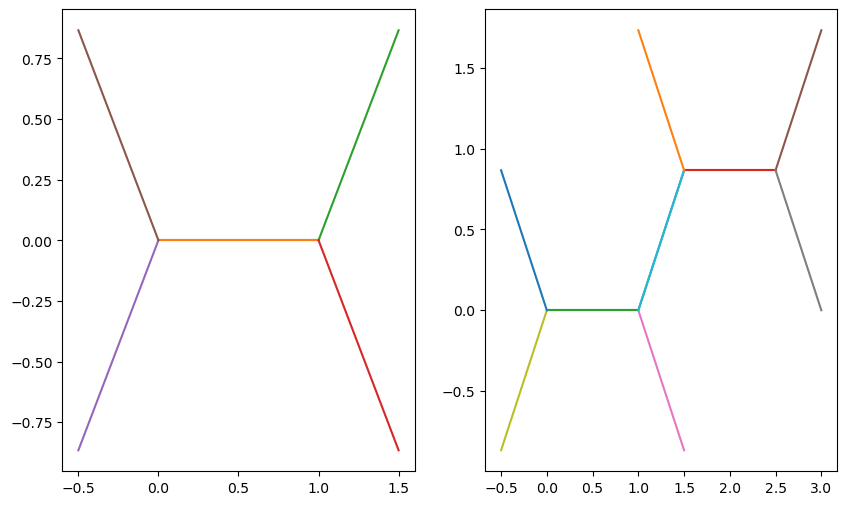

In [34]:
orbs_dic = duplicator.orbs_dic
pos      = duplicator.pos
a1, a2   = duplicator.prims
hops     = duplicator.hops

new_orbs_dic = duplicator.new_orbs_dic
new_pos      = duplicator.new_pos
A1, A2       = duplicator.new_prims
new_hops     = duplicator.new_hops


fig, axs = plt.subplots(1,2,figsize=(10,6))

for hop in hops:
    o1,o2,n,m,t = hop
    o1i = orbs_dic[o1]
    o2i = orbs_dic[o2]
    
    x1,y1 = pos[o1i]
    x2,y2 = pos[o2i] + n*a1 + m*a2
    axs[0].plot([x1,x2],[y1,y2])
    
vec1 = A1[0]*a1 + A1[1]*a2
vec2 = A2[0]*a1 + A2[1]*a2

for hop in new_hops:
    print(hop)
    o1,o2,n,m,t = hop
    o1i = new_orbs_dic[o1]
    o2i = new_orbs_dic[o2]

    x1,y1 = new_pos[o1i]
    x2,y2 = new_pos[o2i] + n*vec1 + m*vec2
    # print(x1,y1,x2,y2)
    axs[1].plot([x1,x2],[y1,y2])
    
plt.show()
    

# Build Hamiltonian for nanoribbon slice

['A1', 'B1', 0, 0, 1] 0 1
['A2', 'B2', 0, 0, 1] 2 3
['B1', 'A1', 0, 0, 1] 1 0
['B2', 'A2', 0, 0, 1] 3 2
['B1', 'A2', 0, 0, 1] 1 2
['B2', 'A1', 1, 1, 1] 3 0
['B1', 'A2', 0, -1, 1] 1 2
['B2', 'A1', 1, 0, 1] 3 0
['A1', 'B2', -1, -1, 1] 0 3
['A2', 'B1', 0, 0, 1] 2 1
['A1', 'B2', -1, 0, 1] 0 3
['A2', 'B1', 0, 1, 1] 2 1


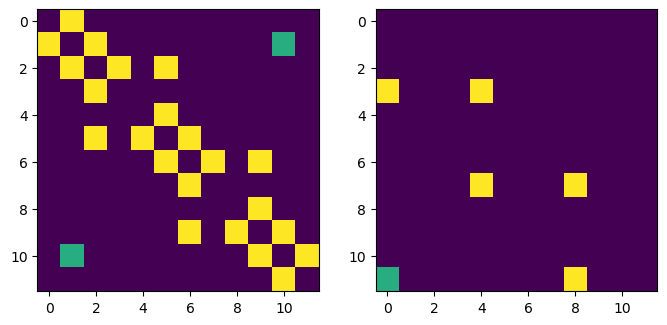

In [38]:
# build the Hamiltonian for the nanoribbon from the hoppings

new_orbs_dic = duplicator.new_orbs_dic
new_pos      = duplicator.new_pos
A1, A2       = duplicator.new_prims
new_hops     = duplicator.new_hops
new_No       = duplicator.new_No

W = 3 # number of unit cells in the direction of the width
C = W*new_No
h = np.zeros([C,C], dtype=complex)
u = h*1.0

k = 0.9
twist = True

for hop in new_hops:
    
    o1,o2,n,m,t = hop
    o1i = new_orbs_dic[o1]
    o2i = new_orbs_dic[o2]
    
    print(hop, o1i,o2i)
    for j in range(W):
        
        # Decide the boundary conditions for the sites in the margins
        ph = 1 # hopping phase term
        if j == W-1 and m == 1 or j == 0 and m == -1:
            
            # Twisted boundary conditions
            if twist:
                ph = np.exp(1j*k*m)
                
            # Open boundary conditions
            else:
                ph = 0

        
        i = o1i + j*new_No
        j = o2i + ((j+m)%W)*new_No
        if n == 0: h[i,j] += t*ph
        if n == 1: u[i,j] += t*ph

        
fig, axs = plt.subplots(1,2,figsize=(8,5))
axs[0].imshow(np.real(h))
axs[1].imshow(np.real(u))
plt.show()